<a href="https://colab.research.google.com/github/udayPatil45/Computer_Vision_SOC/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image Processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushroom.png to mushroom.png


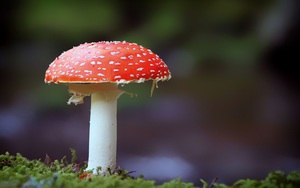

In [ ]:
from IPython.display import Image, display
display(Image('mushroom.png'))

In [ ]:
def load_greyscale_image(filename):
    """
    Loads an image from the given file and returns a dictionary
    representing that image.  This also performs conversion to greyscale.

    Invoked as, for example:
       i = load_greyscale_image("test_images/cat.png")
    """
    with open(filename, "rb") as img_handle:
        img = Image.open(img_handle)
        img_data = img.getdata()
        if img.mode.startswith("RGB"):
            pixels = [round(.299 * p[0] + .587 * p[1] + .114 * p[2])
                      for p in img_data]
        elif img.mode == "LA":
            pixels = [p[0] for p in img_data]
        elif img.mode == "L":
            pixels = list(img_data)
        else:
            raise ValueError(f"Unsupported image mode: {img.mode}")
        width, height = img.size
        return {"height": height, "width": width, "pixels": pixels}


def save_greyscale_image(image, filename, mode="PNG"):
    """
    Saves the given image to disk or to a file-like object.  If filename is
    given as a string, the file type will be inferred from the given name.  If
    filename is given as a file-like object, the file type will be determined
    by the "mode" parameter.
    """
    out = Image.new(mode="L", size=(image["width"], image["height"]))
    out.putdata(image["pixels"])
    if isinstance(filename, str):
        out.save(filename)
    else:
        out.save(filename, mode)
    out.close()

In [ ]:
import math

from PIL import Image

# NO ADDITIONAL IMPORTS ALLOWED!


def get_pixel(image, row, col):
    """
    Given row index and column index, this function
    returns the pixel from image["pixels"]
    based on the boundary behavior
    """
    return image["pixels"][col, row]


def set_pixel(image, row, col, color):
    image["pixels"][row*image["width"] + col] = color


def apply_per_pixel(image, func):

    """
    Apply the given function to each pixel in an image and return the resulting image.

    Parameters:
    image (dict): A dictionary representing an image, with keys:
                    - "height" (int): The height of the image.
                    - "width" (int): The width of the image.
                    - "pixels" (list): A list of pixel values.
    func (callable): A function that takes a single pixel value and returns a new pixel value.

    Returns:
    dict: A new image dictionary with the same dimensions as the input image, but with each
            pixel value modified by the given function.
    """

    raise NotImplementedError


def inverted(image):
    return apply_per_pixel(image, lambda color: 255-color)


# HELPER FUNCTIONS

def correlate(image, kernel, boundary_behavior):
    """
    Compute the result of correlating the given image with the given kernel.
    `boundary_behavior` will one of the strings "zero", "extend", or "wrap",
    and this function will treat out-of-bounds pixels as having the value zero,
    the value of the nearest edge, or the value wrapped around the other edge
    of the image, respectively.

    if boundary_behavior is not one of "zero", "extend", or "wrap", return
    None.

    Otherwise, the output of this function should have the same form as a 6.101
    image (a dictionary with "height", "width", and "pixels" keys), but its
    pixel values do not necessarily need to be in the range [0,255], nor do
    they need to be integers (they should not be clipped or rounded at all).

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.

    DESCRIBE YOUR KERNEL REPRESENTATION HERE
    """
    raise NotImplementedError


def round_and_clip_image(image):
    """
    Given a dictionary, ensure that the values in the "pixels" list are all
    integers in the range [0, 255].

    All values should be converted to integers using Python's `round` function.

    Any locations with values higher than 255 in the input should have value
    255 in the output; and any locations with values lower than 0 in the input
    should have value 0 in the output.
    """
    raise NotImplementedError


# FILTERS

def blurred(image, kernel_size):
    """
    Return a new image representing the result of applying a box blur (with the
    given kernel size) to the given input image.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    """
    # first, create a representation for the appropriate n-by-n kernel (you may
    # wish to define another helper function for this)

    # then compute the correlation of the input image with that kernel

    # and, finally, make sure that the output is a valid image (using the
    # helper function from above) before returning it.
    raise NotImplementedError

def sharpened(image, n):
    """
    Return a new image which is sharper than the input image.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    Output list should be clipped.
    """
    raise NotImplementedError

def edges(image):
    """
    Return a new image with all the edges distincly and clearly detectable.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    Output list should be clipped.
    """
    raise NotImplementedError


if __name__ == "__main__":
    # code in this block will only be run when you explicitly run your script,
    # and not when the tests are being run.  this is a good place for
    # generating images, etc.
    pass


In [ ]:
%%writefile lab.py

import math
from PIL import Image

# NO ADDITIONAL IMPORTS ALLOWED!

def get_pixel(image, row, col):
    """
    Given row index and column index, this function
    returns the pixel from image["pixels"]
    based on the boundary behavior
    """
    # The provided get_pixel function had an incorrect implementation.
    # It should calculate the index in the 1D pixel list based on row and column.
    # This corrected version assumes a flat list of pixels.
    # You will need to implement boundary behavior logic in the correlate function.
    if 0 <= row < image["height"] and 0 <= col < image["width"]:
        return image["pixels"][row * image["width"] + col]
    else:
        # This case should be handled by the boundary_behavior in correlate
        return None # Indicate that this pixel is out of bounds


def set_pixel(image, row, col, color):
    image["pixels"][row*image["width"] + col] = color


def apply_per_pixel(image, func):
    """
    Apply the given function to each pixel in an image and return the resulting image.

    Parameters:
    image (dict): A dictionary representing an image, with keys:
                    - "height" (int): The height of the image.
                    - "width" (int): The width of the image.
                    - "pixels" (list): A list of pixel values.
    func (callable): A function that takes a single pixel value and returns a new pixel value.

    Returns:
    dict: A new image dictionary with the same dimensions as the input image, but with each
            pixel value modified by the given function.
    """
    # Create a new list for the modified pixels
    new_pixels = [0] * (image["height"] * image["width"])

    # Iterate through each pixel and apply the function
    for i in range(len(image["pixels"])):
        new_pixels[i] = func(image["pixels"][i])

    # Return a new image dictionary with the modified pixels
    return {"height": image["height"], "width": image["width"], "pixels": new_pixels}


def inverted(image):
    return apply_per_pixel(image, lambda color: 255-color)


# HELPER FUNCTIONS

def correlate(image, kernel, boundary_behavior):
    """
    Compute the result of correlating the given image with the given kernel.
    `boundary_behavior` will one of the strings "zero", "extend", or "wrap",
    and this function will treat out-of-bounds pixels as having the value zero,
    the value of the nearest edge, or the value wrapped around the other edge
    of the image, respectively.

    if boundary_behavior is not one of "zero", "extend", or "wrap", return
    None.

    Otherwise, the output of this function should have the same form as a 6.101
    image (a dictionary with "height", "width", and "pixels" keys), but its
    pixel values do not necessarily need to be in the range [0,255], nor do
    they need to be integers (they should not be clipped or rounded at all).

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.

    DESCRIBE YOUR KERNEL REPRESENTATION HERE
    The kernel is represented as a list of lists (a 2D list) where the outer list
    represents the rows and the inner lists represent the columns of the kernel.
    The kernel is assumed to be square and have odd dimensions.
    """
    if boundary_behavior not in ["zero", "extend", "wrap"]:
        return None

    img_height = image["height"]
    img_width = image["width"]
    img_pixels = image["pixels"]

    kernel_height = len(kernel)
    kernel_width = len(kernel[0]) # Assuming kernel is square

    # Ensure kernel dimensions are odd
    if kernel_height % 2 == 0 or kernel_width % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    output_pixels = [0] * (img_height * img_width)

    center_row = kernel_height // 2
    center_col = kernel_width // 2

    def get_pixel_with_boundary(r, c):
        if 0 <= r < img_height and 0 <= c < img_width:
            return img_pixels[r * img_width + c]
        else:
            if boundary_behavior == "zero":
                return 0
            elif boundary_behavior == "extend":
                # Clamp row and column to the nearest edge
                clamped_r = max(0, min(r, img_height - 1))
                clamped_c = max(0, min(c, img_width - 1))
                return img_pixels[clamped_r * img_width + clamped_c]
            elif boundary_behavior == "wrap":
                # Wrap around using modulo
                wrapped_r = r % img_height
                wrapped_c = c % img_width
                return img_pixels[wrapped_r * img_width + wrapped_c]

    for r in range(img_height):
        for c in range(img_width):
            output_value = 0
            for kr in range(kernel_height):
                for kc in range(kernel_width):
                    img_r = r + kr - center_row
                    img_c = c + kc - center_col
                    output_value += get_pixel_with_boundary(img_r, img_c) * kernel[kr][kc]
            output_pixels[r * img_width + c] = output_value

    return {"height": img_height, "width": img_width, "pixels": output_pixels}


def round_and_clip_image(image):
    """
    Given a dictionary, ensure that the values in the "pixels" list are all
    integers in the range [0, 255].

    All values should be converted to integers using Python's `round` function.

    Any locations with values higher than 255 in the input should have value
    255 in the output; and any locations with values lower than 0 in the input
    should have value 0 in the output.
    """
    rounded_clipped_pixels = []
    for pixel in image["pixels"]:
        rounded_pixel = round(pixel)
        clipped_pixel = max(0, min(255, rounded_pixel))
        rounded_clipped_pixels.append(clipped_pixel)

    return {"height": image["height"], "width": image["width"], "pixels": rounded_clipped_pixels}


# FILTERS

def blurred(image, kernel_size):
    """
    Return a new image representing the result of applying a box blur (with the
    given kernel size) to the given input image.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    """
    # first, create a representation for the appropriate n-by-n kernel (you may
    # wish to define another helper function for this)
    if kernel_size <= 0 or kernel_size % 2 == 0:
        raise ValueError("Kernel size must be a positive odd integer")

    kernel_value = 1 / (kernel_size * kernel_size)
    kernel = [[kernel_value for _ in range(kernel_size)] for _ in range(kernel_size)]

    # then compute the correlation of the input image with that kernel
    correlated_image = correlate(image, kernel, "extend") # Using extend boundary behavior for blur

    # and, finally, make sure that the output is a valid image (using the
    # helper function from above) before returning it.
    return round_and_clip_image(correlated_image)


def sharpened(image, n):
    """
    Return a new image which is sharper than the input image.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    Output list should be clipped.
    """
    # Sharpening can be achieved by taking the original image and adding a scaled
    # version of the difference between the original and a blurred version.
    # A common kernel for sharpening is based on the identity kernel minus a blurred kernel.

    # Create an identity kernel of size n x n
    if n <= 0 or n % 2 == 0:
         raise ValueError("Kernel size must be a positive odd integer")

    identity_kernel = [[0 for _ in range(n)] for _ in range(n)]
    identity_kernel[n // 2][n // 2] = 1

    # Create a blurred kernel of size n x n
    blur_kernel_value = 1 / (n * n)
    blur_kernel = [[blur_kernel_value for _ in range(n)] for _ in range(n)]

    # Calculate the sharpening kernel: 2 * identity_kernel - blurred_kernel
    sharpen_kernel = [[2 * identity_kernel[r][c] - blur_kernel[r][c] for c in range(n)] for r in range(n)]

    # Correlate the image with the sharpening kernel
    correlated_image = correlate(image, sharpen_kernel, "extend") # Using extend boundary behavior

    # Round and clip the result
    return round_and_clip_image(correlated_image)


def edges(image):
    """
    Return a new image with all the edges distincly and clearly detectable.

    This process should not mutate the input image; rather, it should create a
    separate structure to represent the output.
    Output list should be clipped.
    """
    # Edge detection can be done using Sobel operators.
    # We'll use two kernels, one for detecting horizontal edges and one for vertical edges.

    # Horizontal Sobel kernel
    sobel_h = [[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]]

    # Vertical Sobel kernel
    sobel_v = [[-1,  0,  1],
               [-2,  0,  2],
               [-1,  0,  1]]

    # Correlate the image with both kernels
    correlated_h = correlate(image, sobel_h, "extend") # Using extend boundary behavior
    correlated_v = correlate(image, sobel_v, "extend") # Using extend boundary behavior

    # Calculate the magnitude of the gradients: sqrt(h_correlated^2 + v_correlated^2)
    output_pixels = []
    for i in range(len(correlated_h["pixels"])):
        magnitude = math.sqrt(correlated_h["pixels"][i]**2 + correlated_v["pixels"][i]**2)
        output_pixels.append(magnitude)

    # Create a new image dictionary with the calculated magnitudes
    magnitude_image = {"height": image["height"], "width": image["width"], "pixels": output_pixels}

    # Round and clip the result
    return round_and_clip_image(magnitude_image)


if __name__ == "__main__":
    # code in this block will only be run when you explicitly run your script,
    # and not when the tests are being run.  this is a good place for
    # generating images, etc.
    pass

Writing lab.py


In [ ]:
"import os
import pickle
import hashlib

import lab
import pytest

TEST_DIRECTORY = os.path.dirname(lab.py)


def object_hash(x):
    return hashlib.sha512(pickle.dumps(x)).hexdigest()


def compare_images(im1, im2):
    assert set(im1.keys()) == {'height', 'width', 'pixels'}, 'Incorrect keys in dictionary'
    assert im1['height'] == im2['height'], 'Heights must match'
    assert im1['width'] == im2['width'], 'Widths must match'
    assert len(im1['pixels']) == im1['height']*im1['width'], 'Incorrect number of pixels'
    assert all(isinstance(i, int) for i in im1['pixels']), 'Pixels must all be integers'
    assert all(0<=i<=255 for i in im1['pixels']), 'Pixels must all be in the range from [0, 255]'
    pix_incorrect = (None, None)
    for ix, (i, j) in enumerate(zip(im1['pixels'], im2['pixels'])):
        if i != j:
            pix_incorrect = (ix, abs(i-j))
    assert pix_incorrect == (None, None), 'Pixels must match.  Incorrect value at location %s (differs from expected by %s)' % pix_incorrect



def test_load():
    result = lab.load_greyscale_image(os.path.join(TEST_DIRECTORY, 'test_images', 'centered_pixel.png'))
    expected = {
        'height': 11,
        'width': 11,
        'pixels': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    }
    compare_images(result, expected)


def test_inverted_1():
    im = lab.load_greyscale_image(os.path.join(TEST_DIRECTORY, 'test_images', 'centered_pixel.png'))
    result = lab.inverted(im)
    expected = {
        'height': 11,
        'width': 11,
        'pixels': [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                   255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    }
    compare_images(result, expected)

def test_inverted_2():
    assert False

@pytest.mark.parametrize("fname", ['mushroom', 'twocats', 'chess'])
def test_inverted_images(fname):
    inpfile = os.path.join(TEST_DIRECTORY, 'test_images', '%s.png' % fname)
    expfile = os.path.join(TEST_DIRECTORY, 'test_results', '%s_invert.png' % fname)
    im = lab.load_greyscale_image(inpfile)
    oim = object_hash(im)
    result = lab.inverted(im)
    expected = lab.load_greyscale_image(expfile)
    assert object_hash(im) == oim, 'Be careful not to modify the original image!'
    compare_images(result, expected)


@pytest.mark.parametrize("kernsize", [1, 3, 7])
@pytest.mark.parametrize("fname", ['mushroom', 'twocats', 'chess'])
def test_blurred_images(kernsize, fname):
    inpfile = os.path.join(TEST_DIRECTORY, 'test_images', '%s.png' % fname)
    expfile = os.path.join(TEST_DIRECTORY, 'test_results', '%s_blur_%02d.png' % (fname, kernsize))
    input_img = lab.load_greyscale_image(inpfile)
    input_hash = object_hash(input_img)
    result = lab.blurred(input_img, kernsize)
    expected = lab.load_greyscale_image(expfile)
    assert object_hash(input_img) == input_hash, "Be careful not to modify the original image!"
    compare_images(result, expected)

@pytest.mark.parametrize("kernsize", [1, 3, 9])
@pytest.mark.parametrize("fname", ['mushroom', 'twocats', 'chess'])
def test_sharpened_images(kernsize, fname):
    inpfile = os.path.join(TEST_DIRECTORY, 'test_images', '%s.png' % fname)
    expfile = os.path.join(TEST_DIRECTORY, 'test_results', '%s_sharp_%02d.png' % (fname, kernsize))
    input_img = lab.load_greyscale_image(inpfile)
    input_hash = object_hash(input_img)
    result = lab.sharpened(input_img, kernsize)
    expected = lab.load_greyscale_image(expfile)
    assert object_hash(input_img) == input_hash, "Be careful not to modify the original image!"
    compare_images(result, expected)


@pytest.mark.parametrize("fname", ['mushroom', 'twocats', 'chess'])
def test_edges_images(fname):
    inpfile = os.path.join(TEST_DIRECTORY, 'test_images', '%s.png' % fname)
    expfile = os.path.join(TEST_DIRECTORY, 'test_results', '%s_edges.png' % fname)
    input_img = lab.load_greyscale_image(inpfile)
    input_hash = object_hash(input_img)
    result = lab.edges(input_img)
    expected = lab.load_greyscale_image(expfile)
    assert object_hash(input_img) == input_hash, "Be careful not to modify the original image!"
    compare_images(result, expected)

AttributeError: module 'lab' has no attribute 'py'

# Assignment

 Question 1: Image Preprocessing

In [ ]:
image = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
def dictionary_conversion(image):
    image_proj = image.reshape(image.shape[0]*image.shape[1])
    return {
        "height": image.shape[0],
        "width": image.shape[1],
        "pixels": image_proj
    }


In [ ]:
def padding(image_dict):
    padded = np.zeros((2 * image_dict["height"], 2 * image_dict["width"]))
    # Place original image at center (optional step for true symmetry)
    return padded


Question 2: Frequency Domain Filters

In [ ]:
def gaussian_fil(shape, sigma):
    h, w = shape
    center = (h//2, w//2)
    gaussian_filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            dist = np.sqrt((i-center[0])**2 + (j-center[1])**2)
            gaussian_filter[i, j] = np.exp(-(dist**2) / (2*sigma**2))
    return gaussian_filter


In [ ]:
def lowpass_filter_circular(shape, radius):
    h, w = shape
    center = (h//2, w//2)
    filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if np.sqrt((i - center[0])**2 + (j - center[1])**2) < radius:
                filter[i, j] = 1
    return filter


Question 3: Frequency Domain Processing

In [ ]:
f = np.fft.fft2(padded_image)
fshift = np.fft.fftshift(f)


In [ ]:
filtered = fshift * gaussian_filter


In [ ]:
inverse_img = np.fft.ifft2(np.fft.ifftshift(filtered))
spatial_result = np.abs(inverse_img)


Question 4: Frequency Spectrum Visualization

In [ ]:
def power_spectral_density(fourier_image):
    magnitude_spectrum = np.log(np.abs(fourier_image)**2 + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Power Spectral Density")
    plt.show()
